In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [11]:
class myclassback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,log={}):
        if(log.get('loss')<0.2):
            print("Reached required accuracy")
            self.model.stop_training = True            

In [12]:
clback = myclassback()

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

9


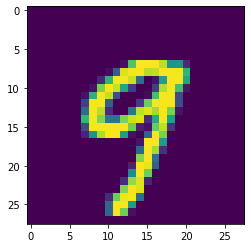

In [7]:
plt.imshow(x_train[45])
print(y_train[45])

In [8]:
x_train  = x_train / 255.0
x_test = x_test / 255.0

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(150, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [10]:
model.compile(optimiser = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [13]:
model.fit(x_train,y_train,epochs = 10, callbacks = [clback])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2431 - acc: 0.9294
Epoch 2/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1135 - acc: 0.9664


In [14]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 28us/sample - loss: 0.0983 - acc: 0.9726


[0.0983447917137295, 0.9726]